In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - queue size parameter study - 80 Nodes

In [69]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\queue_size\\data_spd_2_n_60_q_20_0.25_pdf.csv')

In [70]:
df.head()

,run,packetCapacity,sendInterval,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-59-20211212-08:47...,20,0.25,9,TARPNetwork.node[22].app[0],3134.0,3134000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,RandomWaypointMobility-SPD-B-59-20211212-08:47...,20,0.25,9,TARPNetwork.node[17].app[0],NaN,NaN,1541.0,1541000.0,1541.0,3600.0,3600.0,3600000.0
2,RandomWaypointMobility-SPD-B-56-20211212-08:42...,20,0.25,6,TARPNetwork.node[17].app[0],NaN,NaN,2169.0,2169000.0,2169.0,3600.0,3600.0,3600000.0
3,RandomWaypointMobility-SPD-B-54-20211212-08:38...,20,0.25,4,TARPNetwork.node[22].app[0],3287.0,3287000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomWaypointMobility-SPD-B-54-20211212-08:38...,20,0.25,4,TARPNetwork.node[17].app[0],NaN,NaN,2679.0,2679000.0,2679.0,3600.0,3600.0,3600000.0


In [71]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [72]:
df = df.sort_values(by=['repetition'])

In [73]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [74]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [75]:
print (results)   

[0.8514, 0.7469, 0.8041, 0.7011, 0.8663, 0.7466, 0.7864, 0.7891, 0.8279, 0.6942]


In [76]:
print (results_x) 

[0.9428, 0.8842, 0.8792, 0.905, 0.9131, 0.7919, 0.8611, 0.9294, 0.9322, 0.8706]


In [77]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 78.14


In [78]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 89.1


In [81]:
df_spd_2_x_1 = pd.DataFrame({'QueueSize':[2, 4, 5, 10, 15, 20],
                       'PDF':[86.96, 85.54, 85.54, 89.93, 89.93, 86.96]})

df_spd_2_x_1_errors = [5.18 , 5.46, 5.46, 6.98, 6.53, 5.18]

df_spd_2_x_2 = pd.DataFrame({'QueueSize':[2, 4, 5, 10, 15, 20],
                       'PDF':[87.53, 87.3, 87.92, 82.12, 90.77, 84.72]})

df_spd_2_x_2_errors = [ 3.44, 3.97, 3.94, 7.59, 4.17, 5.33]


df_spd_2_x_4 = pd.DataFrame({'QueueSize':[2, 4, 5, 10, 15, 20],
                       'PDF':[ 84.23, 88.75, 84.64, 84.53, 87.97, 89.1]})

df_spd_2_x_4_errors = [6.74, 4.44, 6.38, 7.02, 3.72, 2.62 ]


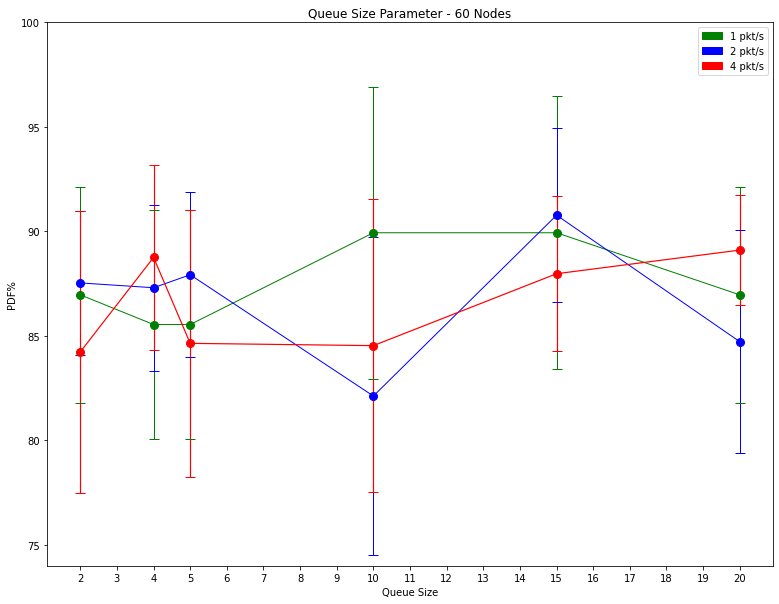

In [83]:
plt.xlabel("Queue Size")
plt.ylabel("PDF%")
plt.title("Queue Size Parameter - 60 Nodes")

plt.xticks(np.arange(0,25, 1))
plt.yticks(np.arange(70,101, 5))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([74, 100])

plt.errorbar(
  x=df_spd_2_x_1.QueueSize, 
  y=df_spd_2_x_1.PDF, 
  yerr=df_spd_2_x_1_errors, 
  capsize=5,
  marker='o', 
  color='green', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x_2.QueueSize, 
  y=df_spd_2_x_2.PDF, 
  yerr=df_spd_2_x_2_errors, 
  capsize=5,
  marker='o', 
  color='blue', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x_4.QueueSize, 
  y=df_spd_2_x_4.PDF, 
  yerr=df_spd_2_x_4_errors, 
  capsize=5,
  marker='o', 
  color='red', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='red', label='4 pkt/s')
green_patch = mpatches.Patch(color='green', label='1 pkt/s')
blue_patch = mpatches.Patch(color='blue', label='2 pkt/s')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(13, 10)
plt.savefig('simulation-pdf-60-new-queue.png', dpi=300)